In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
BASE_URL = "http://books.toscrape.com/catalogue/"

# Función para obtener los enlaces de los libros de una página
def get_books_urls(page_url):
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    books_urls = []
    for book in soup.find('ol').find_all('li'):
        book_url = book.find('article', class_='product_pod').find('div').find('a')['href']
        books_urls.append(BASE_URL + book_url)
    return books_urls

# Función para extraer nombre, precio y rating de un libro
def get_book_details(book_url):
    response = requests.get(book_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    product_main = soup.find('div', class_='col-sm-6 product_main')
    name = product_main.find('h1').text
    price = product_main.find('p', class_='price_color').text
    rating_element = product_main.find('p', class_='star-rating')
    if rating_element:
        rating_class = rating_element.get('class')  # Esto devolverá una lista de clases
        rating_conversion = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
        # Asumiendo que siempre hay una clase que indica el rating y es única
        rating = rating_conversion.get(rating_class[1], None) if rating_class else None
    else:
        rating = None
    return {'name': name, 'price': price, 'rating': rating}

# Función para iterar sobre las páginas y extraer los datos
def scrape_books(num_pages):
    books_details = []
    for i in range(1, num_pages + 1):
        page_url = f"http://books.toscrape.com/catalogue/page-{i}.html"
        books_urls = get_books_urls(page_url)
        for book_url in books_urls:
            book_details = get_book_details(book_url)
            books_details.append(book_details)
    return books_details

In [20]:
books_data = scrape_books(2)
books_df = pd.DataFrame(books_data)
print(books_df)

                                                 name    price  rating
0                                A Light in the Attic  Â£51.77       3
1                                  Tipping the Velvet  Â£53.74       1
2                                          Soumission  Â£50.10       1
3                                       Sharp Objects  Â£47.82       4
4               Sapiens: A Brief History of Humankind  Â£54.23       5
5                                     The Requiem Red  Â£22.65       1
6   The Dirty Little Secrets of Getting Your Dream...  Â£33.34       4
7   The Coming Woman: A Novel Based on the Life of...  Â£17.93       3
8   The Boys in the Boat: Nine Americans and Their...  Â£22.60       4
9                                     The Black Maria  Â£52.15       1
10     Starving Hearts (Triangular Trade Trilogy, #1)  Â£13.99       2
11                              Shakespeare's Sonnets  Â£20.66       4
12                                        Set Me Free  Â£17.46       5
13  Sc

In [21]:
books_df['price'] = books_df['price'].str.replace('Â£', '').astype(float)

In [28]:
books_df

,name,rating
price,,
51.77,A Light in the Attic,3
53.74,Tipping the Velvet,1
50.10,Soumission,1
47.82,Sharp Objects,4
54.23,Sapiens: A Brief History of Humankind,5
22.65,The Requiem Red,1
33.34,The Dirty Little Secrets of Getting Your Dream...,4
17.93,The Coming Woman: A Novel Based on the Life of...,3
22.60,The Boys in the Boat: Nine Americans and Their...,4


KeyError: "None of [Float64Index([51.77, 53.74,  50.1, 47.82, 54.23, 22.65, 33.34, 17.93,  22.6,\n              52.15, 13.99, 20.66, 17.46, 52.29, 35.02, 57.25, 23.88, 37.59,\n              51.33, 45.17, 12.84, 37.32, 30.52, 25.27, 34.53, 54.64,  22.5,\n              53.13,  40.3, 44.18, 17.66, 31.05, 23.82, 36.89, 15.94, 33.29,\n              18.02, 19.63, 52.22, 33.63],\n             dtype='float64', name='price')] are in the [columns]"

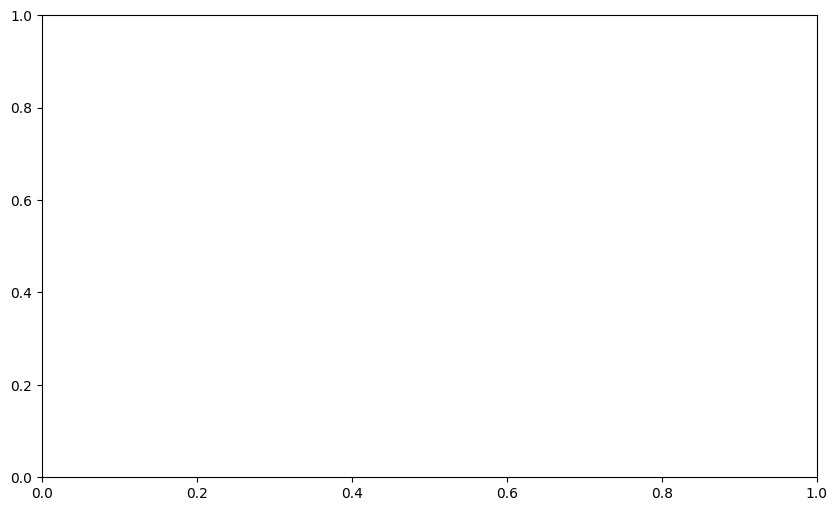

In [43]:
books_df.plot(kind='scatter', x=books_df.index, y='rating', figsize=(10, 6))

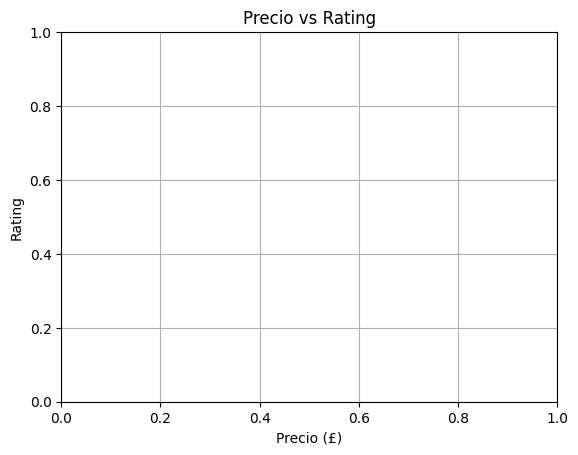

In [42]:
plt.title('Precio vs Rating')
plt.xlabel('Precio (£)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()